In [50]:
import pandas as pd
import seaborn as sns

In [18]:
path = "C:/Users/stask/Analitics_Karpov/Module3/taxi_peru.csv"
taxi = pd.read_csv(path, sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [28]:
# 1) Now get a series with the number of unique values
# for each column and assign it to the variable unique_num.
unique_num = taxi.nunique()
unique_num

journey_id          23111
user_id              1390
driver_id             168
taxi_id               213
icon                    3
start_type              3
start_at            20987
start_lat           11753
start_lon            8489
end_at              21780
end_lat             12266
end_lon              9084
end_state               6
driver_start_lat    18425
driver_start_lon    18314
arrived_at          17156
source                  5
driver_score            6
rider_score             6
dtype: int64

In [49]:
#  Check from which platform the most orders were made. Answer with % value rounded to integers.
platform_distribution = (taxi.source.value_counts() / taxi.shape[0]).mul(100).round() \
    .reset_index().rename(columns={'index':'source','source':'percentage'})
platform_distribution

,source,percentage
0,iPhone,42.0
1,web,33.0
2,Android,21.0
3,iPad,2.0
4,Wap,1.0


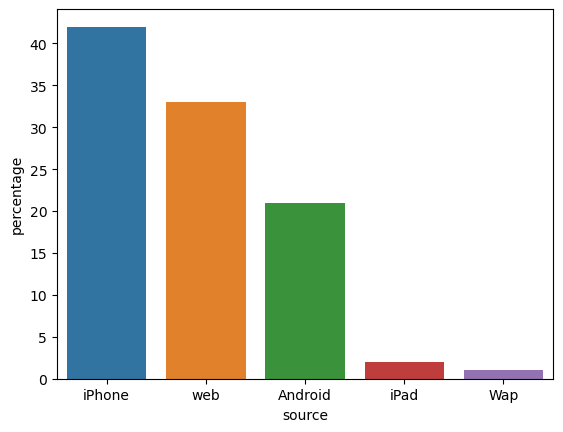

In [65]:
ax = sns.barplot(x='source', y='percentage', data=platform_distribution)

In [64]:
# The same graph, but trying to use countplot function and put in the right order
order = taxi['source'].value_counts().index
order

Index(['iPhone', 'web', 'Android', 'iPad', 'Wap'], dtype='object')

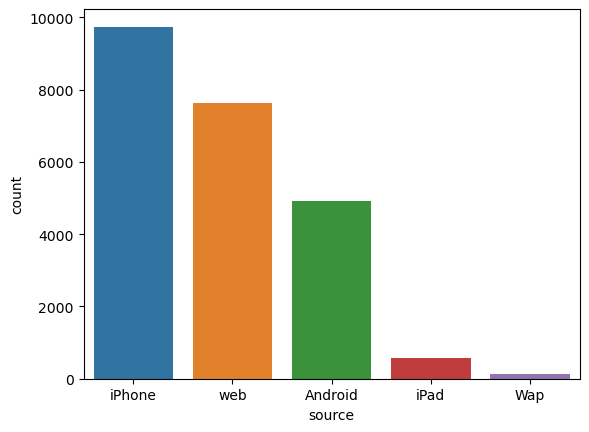

In [63]:
a = sns.countplot(x='source', data=taxi, order=order)

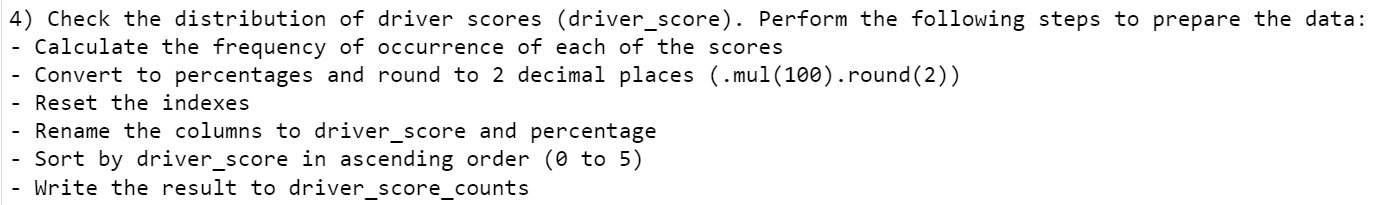

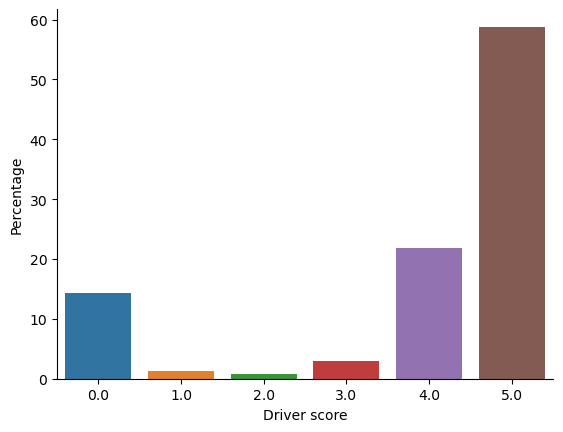

In [71]:
driver_score_counts = (taxi.driver_score.value_counts() / taxi.query('driver_score >= 0').shape[0]).mul(100).round(2) \
    .reset_index().rename(columns={'index':'score','driver_score':'percentage'}) \
    .sort_values('percentage', ascending=True)
ax = sns.barplot(x='score', y='percentage', data=driver_score_counts)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine() # remove part of the chart frame

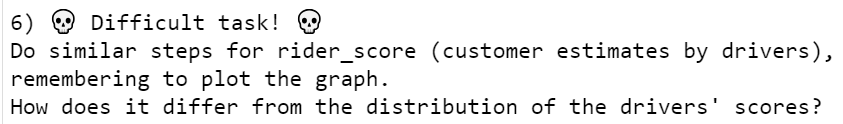

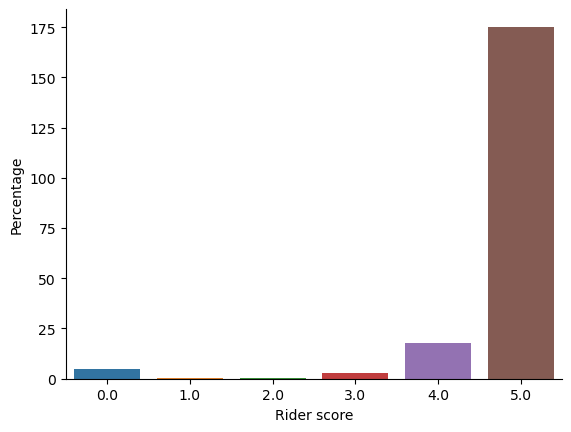

In [72]:
rider_score_counts = (taxi.rider_score.value_counts() / taxi.query('driver_score >= 0').shape[0]).mul(100).round(2) \
    .reset_index().rename(columns={'index':'score','rider_score':'percentage'}) \
    .sort_values('percentage', ascending=True)
ax = sns.barplot(x='score', y='percentage', data=rider_score_counts)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine() # remove part of the chart frame